## Observations and Insights 

## 1a. Most mice (~75%) who where treated with Capomulin and Ramicane had tumor volume between 20 and 50.

## 1b. Whereas the minimum tumor volume for mice treated with Ifubinol and Ceftamin begin around 50.

## 2. Mice who took Capomulin saw an average decrease in tumor size as time went by

## 3. There is a positive correlation between mice weight and tumor size

In [170]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [20]:
# Checking the number of mice.
len(merged_df['Mouse ID'])

1893

In [21]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

dupe_df= merged_df[merged_df.duplicated(['Mouse ID', 'Timepoint'])]
dupe_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 



In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged_df.drop(merged_df[merged_df['Mouse ID']== 'g989'].index, inplace=True)

In [7]:
# Checking the number of mice in the clean DataFrame.
len(merged_df)

1880

In [8]:
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dv = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({"Tumor Mean": mean, "Tumor Median": median, "Tumor Variance": variance, "Tumor Standard Deviation": standard_dv, "Tumor SEM": sem})
summary_df





,Tumor Mean,Tumor Median,Tumor Variance,Tumor Standard Deviation,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
grouped_df = merged_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})

#rename columns
grouped_df.columns = ['Tumor Mean', 'Tumor Median', 'Tumo Variance', 'Tumor Standard Deviation', 'Tumor SEM']
grouped_df

,Tumor Mean,Tumor Median,Tumo Variance,Tumor Standard Deviation,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Mice Count')

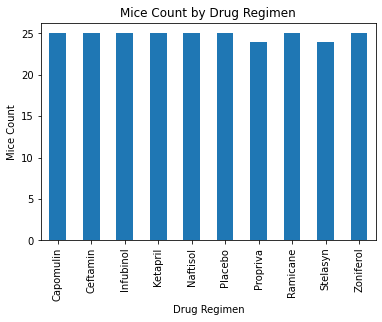

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
bar_data = merged_df.groupby('Drug Regimen').nunique()['Mouse ID']
bar_plot = bar_data.plot.bar(title = 'Mice Count by Drug Regimen')

bar_plot.set_xlabel('Drug Regimen')
bar_plot.set_ylabel('Mice Count')


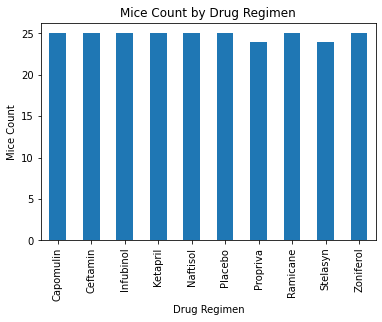

In [15]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
pyplot_data = merged_df.groupby('Drug Regimen').nunique()['Mouse ID']
pyplot_data.plot.bar(legend = False)
plt.title('Mice Count by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Mice Count')
plt.show()

Text(0, 0.5, 'Sex')

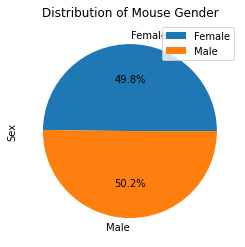

In [117]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_data = merged_df.groupby('Sex').nunique()['Mouse ID']
pie_chart = pie_data.plot.pie(title = 'Distribution of Mouse Gender', autopct = '%1.1f%%', legend = True)
pie_chart.set_ylabel('Sex')

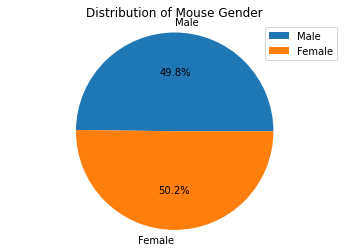

In [116]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sizes = pie_data.values
labels = 'Male', 'Female'
fig1, ax1 = plt.subplots()
plt.title('Distribution of Mouse Gender')
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
plt.legend()
plt.show()

## Quartiles, Outliers and Boxplots

In [46]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
final_tumor = round(merged_df.groupby('Mouse ID').max().reset_index(),2)
final_tumor




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.97,2
1,a251,Infubinol,Female,21,25,45,65.53,1
2,a262,Placebo,Female,17,29,45,70.72,4
3,a275,Ceftamin,Female,20,28,45,63.00,3
4,a366,Stelasyn,Female,16,29,30,63.44,1
...,...,...,...,...,...,...,...,...
244,z435,Propriva,Female,12,26,10,48.71,0
245,z578,Ramicane,Male,11,16,45,45.00,0
246,z581,Infubinol,Female,24,25,45,62.75,3
247,z795,Naftisol,Female,13,29,45,65.74,3


In [71]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_merge = final_tumor[['Mouse ID','Timepoint']].merge(merged_df, on=['Mouse ID','Timepoint'], how='left')

cric_drugs= new_merge[new_merge['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
cric_drugs.round(2)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.97,2
1,a251,45,Infubinol,Female,21,25,65.53,1
3,a275,45,Ceftamin,Female,20,28,63.00,3
6,a411,45,Ramicane,Male,3,22,38.41,1
7,a444,45,Ramicane,Female,10,25,43.05,0
...,...,...,...,...,...,...,...,...
239,y769,45,Ceftamin,Female,6,27,68.59,4
240,y793,45,Capomulin,Male,17,17,31.90,2
241,y865,45,Ceftamin,Male,23,26,64.73,3
245,z578,45,Ramicane,Male,11,16,30.64,0


In [82]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = cric_drugs['Drug Regimen'].unique().tolist()
#treatment
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    outliers_df = cric_drugs.loc[(cric_drugs["Drug Regimen"] == treatment)]
    tumor_vol.append(outliers_df[["Drug Regimen","Tumor Volume (mm3)"]])
    
    # add subset 
    Q1 = outliers_df["Tumor Volume (mm3)"].quantile(0.25)
    Q3 = outliers_df["Tumor Volume (mm3)"].quantile(0.75)
    
    IQR = Q3 - Q1
    
    # Determine outliers using upper and lower bounds
    
    lower = round(Q1 - (1.5 * IQR),2)
    upper = round(Q3 + (1.5 * IQR),2)
    
    print(f"Values below {lower} and above {upper} for {treatments} could be outliers")
    
    
    
    
    

Values below 36.83 and above 82.74 for Infubinol could be outliers
Values below 25.36 and above 87.67 for Ceftamin could be outliers
Values below 17.91 and above 54.31 for Ramicane could be outliers
Values below 20.7 and above 51.83 for Capomulin could be outliers


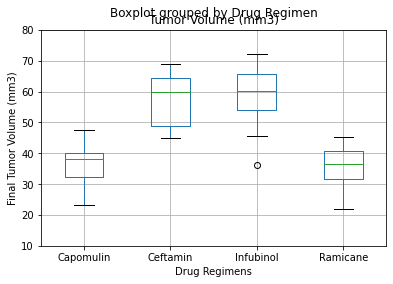

In [115]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#group the last tumor vol by drug and mouse id
final_tumor = cric_drugs.groupby(['Drug Regimen','Mouse ID']).last()['Tumor Volume (mm3)']
#put last tumor data into data frame and reset index
final_df = final_tumor.to_frame().reset_index()
#create boxplot
final_df.boxplot(column = ['Tumor Volume (mm3)'], by =['Drug Regimen'])
plt.ylim(10, 80)
plt.ylabel("Final Tumor Volume (mm3)")
plt.xlabel("Drug Regimens")

plt.show()


## Line and Scatter Plots

In [123]:
#find mice treated with Capomulin
cap_mice= merged_df[merged_df['Drug Regimen']=='Capomulin']
cap_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [132]:
#Isolate data for one mouse
cap_mouse = merged_df[merged_df['Mouse ID']=='s185']
round(cap_mouse,2)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.00,0
11,s185,Capomulin,Female,3,17,5,43.88,0
12,s185,Capomulin,Female,3,17,10,37.61,0
13,s185,Capomulin,Female,3,17,15,38.18,0
14,s185,Capomulin,Female,3,17,20,36.87,0
15,s185,Capomulin,Female,3,17,25,33.95,0
16,s185,Capomulin,Female,3,17,30,32.96,1
17,s185,Capomulin,Female,3,17,35,28.33,1
18,s185,Capomulin,Female,3,17,40,25.47,1
19,s185,Capomulin,Female,3,17,45,23.34,1


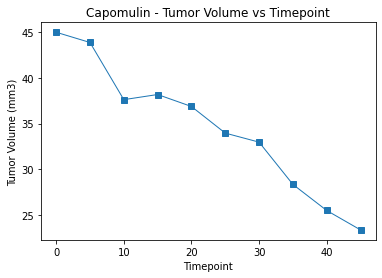

In [133]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

x_values = cap_mouse["Timepoint"]
y_values = cap_mouse["Tumor Volume (mm3)"]
plt.plot(x_values, y_values, marker='s', linewidth=1)

plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin - Tumor Volume vs Timepoint")
plt.show()

In [169]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#Calc avg tumor vol of mice treated with Capomulin
scatter_data = cap_mice.groupby(['Mouse ID','Weight (g)'])['Tumor Volume (mm3)'].mean().reset_index()
round(scatter_data.head(),2)





,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.96
1,b742,21,40.08
2,f966,17,36.51
3,g288,19,41.99
4,g316,22,44.61


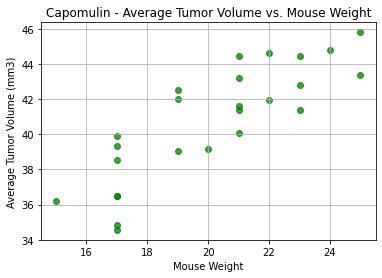

In [168]:
x_values = scatter_data["Weight (g)"]
y_values = scatter_data["Tumor Volume (mm3)"]

# create scatter plot
plt.scatter(x_values, y_values, marker="o", color="green", alpha=0.75)

plt.grid()
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Capomulin - Average Tumor Volume vs. Mouse Weight")
plt.show()


## Correlation and Regression

In [171]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = scatter_data['Weight (g)'].corr(scatter_data['Tumor Volume (mm3)'])

0.8419363424694719

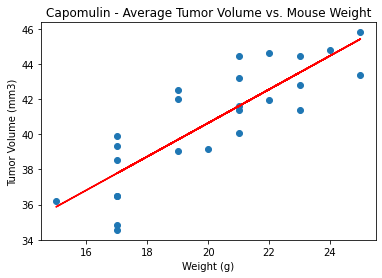

y = 0.95 x + 21.55


In [172]:
x_values = scatter_data["Weight (g)"]
y_values = scatter_data["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin - Average Tumor Volume vs. Mouse Weight")
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.show()
print(line_eq)